<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/ConvexHull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install jarvis-tools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 966 kB 8.5 MB/s 
     |████████████████████████████████| 514 kB 57.4 MB/s 


In [2]:
import numpy as np
from jarvis.core.composition import Composition
from jarvis.db.figshare import data
%matplotlib inline
import matplotlib.pyplot as plt

dataset = data("dft_3d")

Obtaining 3D dataset 55k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1


100%|██████████| 31.9M/31.9M [00:02<00:00, 11.1MiB/s]


Loading the zipfile...
Loading completed.


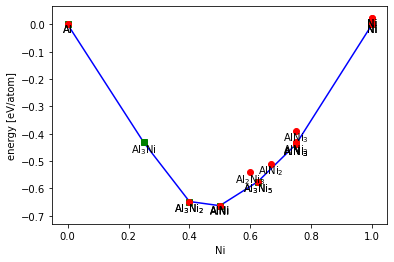

In [3]:
from jarvis.analysis.thermodynamics.energetics import PhaseDiagram
system=['Ni','Al']
z=[]
for i in dataset:
    formula = i["formula"]
    comp = Composition.from_string(formula)
    atom_frac = comp.atomic_fraction
    all_elms = list(comp.to_dict())
    if (set(all_elms)).issubset(set(system)): 
        z.append([i['formula'],i['formation_energy_peratom'],i['jid']])    

pdj=PhaseDiagram(z)
pdj.plot()

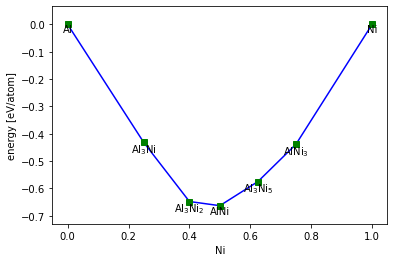

In [5]:
pdj=PhaseDiagram(z,only_plot_stable=True)
pdj.plot()

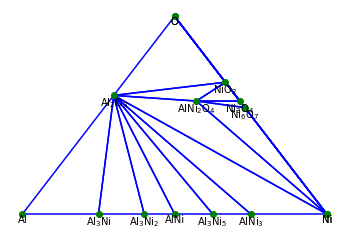

In [6]:
from jarvis.analysis.thermodynamics.energetics import PhaseDiagram
system=['Ni','Al','O']
z=[]
for i in dataset:
    formula = i["formula"]
    comp = Composition.from_string(formula)
    atom_frac = comp.atomic_fraction
    all_elms = list(comp.to_dict())
    if (set(all_elms)).issubset(set(system)): 
        z.append([i['formula'],i['formation_energy_peratom'],i['jid']])    

pdj=PhaseDiagram(z,only_plot_stable=True)
pdj.plot()

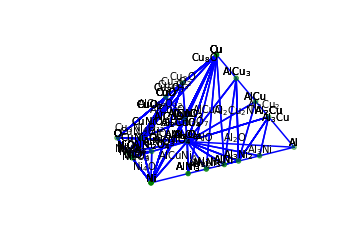

In [7]:
from jarvis.analysis.thermodynamics.energetics import PhaseDiagram
system=['Ni','Al','O','Cu']
z=[]
for i in dataset:
    formula = i["formula"]
    comp = Composition.from_string(formula)
    atom_frac = comp.atomic_fraction
    all_elms = list(comp.to_dict())
    if (set(all_elms)).issubset(set(system)): 
        z.append([i['formula'],i['formation_energy_peratom'],i['jid']])    

pdj=PhaseDiagram(z,only_plot_stable=True)
pdj.plot()

In [8]:
from jarvis.analysis.thermodynamics.energetics import jid_hull

jid='JVASP-1067'
jid_hull(jid=jid,dataset=dataset)

[['Bi2Se3', -0.40429, 'JVASP-1067'], 0.0]

In [ ]:
#DEPRECATED CODE BELOW
import plotly.express as px
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import numpy as np
from jarvis.core.composition import Composition
from jarvis.db.figshare import data

dft_3d = data("dft_3d")

def convex_hull_plot(
    my_data=dft_3d,
    system="Ni-Al",
    show_ehull=True,
    show_stable_labels_only=False,
):
    """Get Con hull, requires my_data as array of dict[{formula,fenp,jid},...]."""
    spec = system.split("-")
    elemental = {}
    mix = {}
    texts = []
    gen = []
    gen.append([0, 0])
    gen.append([1, 0])
    for i in my_data:
        formula = i["formula"]
        comp = Composition.from_string(formula)
        atom_frac = comp.atomic_fraction
        all_elms = list(comp.to_dict())
        # print (comp.to_dict())
        enp = i["formation_energy_peratom"]

        if len(set(all_elms)) == 1 and all_elms[0] in spec:
            elm = all_elms[0]
            # print (elm,enp)
            if elm in elemental and elemental[elm] > enp:
                elemental[elm] = enp
            else:
                elemental[elm] = enp
    for i in my_data:
        formula = i["formula"]
        comp = Composition.from_string(formula)
        atom_frac = comp.atomic_fraction
        all_elms = list(comp.to_dict())
        # print (comp.to_dict())

        if (set(all_elms)) == set(spec):
            mix[atom_frac[spec[0]]] = i["formation_energy_peratom"]
            texts.append(
                [
                    atom_frac[spec[0]],
                    i["formation_energy_peratom"],
                    formula,
                   
                    i['jid']
                ]
            )
            gen.append([atom_frac[spec[0]], i["formation_energy_peratom"]])

    for i in my_data:
        formula = i["formula"]

        if formula==spec[0] and i["formation_energy_peratom"]==0:
            texts.append([0, 0.01, spec[0],i['jid']])
           
        if formula==spec[1]and i["formation_energy_peratom"]==0:
            texts.append([1, 0.01, spec[1],i['jid']])
           
    # texts.append([0, 0.01, spec[0]])
    # texts.append([1, 0.01, spec[1]])

    gen = np.array(gen)
    hull = ConvexHull(points=gen)
    print (hull.vertices)
    stable_points = hull.vertices

    stable_point_energies = {}
    def get_dist(p1=np.array([0,0]),p2=np.array([.4,-.4]),xp=np.array([.33,-.22])):
        p1=np.array(p1)
        p2=np.array(p2)
        return np.linalg.norm(np.cross(p2-p1, p1-xp))/np.linalg.norm(p2-p1)
    def get_min_dist(xp=[],gen=gen,stable_points=stable_points):
      xp=np.array(xp)
      all_dists=[]
      for i in gen[stable_points]:
        for j in gen[stable_points]:
          if i[0]!=j[0] and i[1]!=j[1]:
            p1=[i[0],i[1]]
            p2=[j[0],j[1]]
            dist=get_dist(p1=p1,p2=p2,xp=xp)
            
            all_dists.append(dist)
      return min(all_dists)
      
    #get_min_dist()
    for i in stable_points:
        if texts[i + 2][1] < 0:
            stable_point_energies[texts[i + 2][0]] = texts[i + 2][1]
    

    fig = px.scatter(x=gen[:, 0], y=gen[:, 1],color=["red" for i in range(len(gen[:,0]))])
    for i, simplex in enumerate(hull.simplices):
        if gen[simplex, 1][0] < 0:

            fig.add_scatter(
                x=gen[simplex, 0], y=gen[simplex, 1], line_color="blue"
            )

    for ii, i in enumerate(texts):

        if show_stable_labels_only:
            if ii + 2 in stable_points and i[1] <= 0:
              if show_ehull:
                ehull=get_min_dist(xp=[i[0],i[1]])
                hovertext=str(ehull)
              else:
                hovertext=i[3]
                fig.add_annotation(
                    x=i[0],
                    y=i[1] ,
                    text=i[2],
                    hovertext=hovertext,
                    font=dict(family="sans serif", size=18, color="green"),
                )
                fig.add_annotation(x=0,y=0,text=spec[0],font=dict(family="sans serif", size=18, color="green"))
                fig.add_annotation(x=1,y=0,text=spec[1],font=dict(family="sans serif", size=18, color="green"))

        else:
            if show_ehull:
                ehull=get_min_dist(xp=[i[0],i[1]])
                hovertext=str(ehull)
            else:
              hovertext=i[3]
            fig.add_annotation(
                x=i[0] ,
                y=i[1],
                text=i[2],
                hovertext=hovertext,
                font=dict(family="sans serif", size=18, color="green"),
            )

    fig.update_layout(
        showlegend=False,
        xaxis_title="Mol fraction:" + spec[0],
        yaxis_title="Energy difference (eV)",
    )

    fig.show(config=dict(displayModeBar=False))


convex_hull_plot(system='Ni-Al')

Obtaining 3D dataset 55k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1


100%|██████████| 31.9M/31.9M [00:01<00:00, 16.4MiB/s]


Loading the zipfile...
Loading completed.
[ 1  0  9  5 12  2 13]
